## Problem Description

The <b>Iris flower dataset</b> or Fisher's Iris dataset is a <b>multivatiate</b> dataset introduced by the British Statistician and biologist Ronald Fisher in his 1936 paper. The dataset consists of <b>50 samples</b> from each of three species of Iris(<b>Iris setosa</b>, <b>Iris virginica</b> and <b>Iris versicolor</b>). Four features were measured from each sample: the <b>length</b> and <b>width</b> of the <b>sepals</b> and <b>petals</b>, in centimeters. It is a ternary classification problem.

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

# suppress warnings
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)

## Import Dataset

In [2]:
dataset = pd.read_csv('../../dataset/iris/iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Analysis

In [3]:
dataset = dataset.drop('Id', axis = 'columns')
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.shape

(150, 5)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Data Visualization

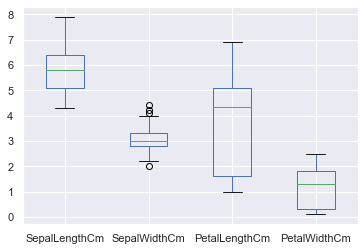

In [8]:
dataset.plot(kind = 'box')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72ee93bc50>,
      dtype=object)

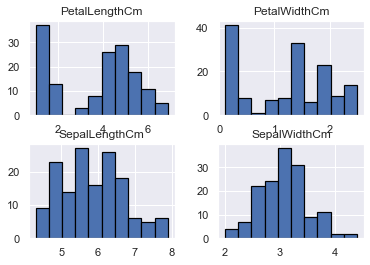

In [9]:
dataset.hist(edgecolor = 'black', linewidth = 1.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72ee3899e8>,
      dtype=object)

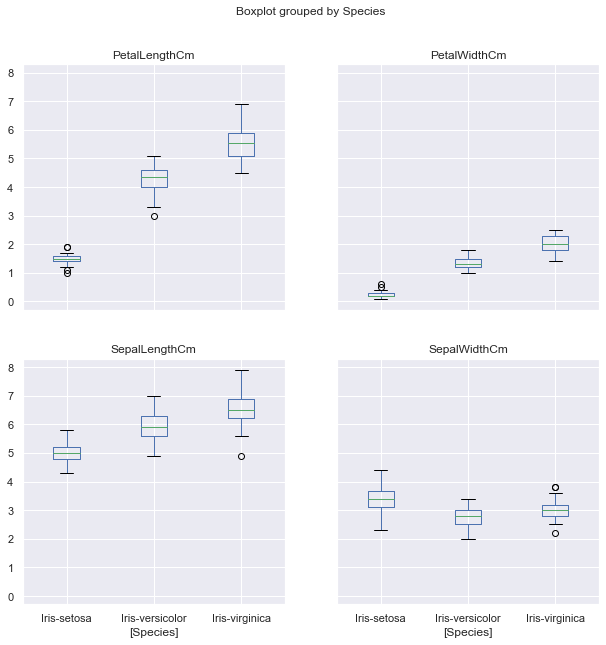

In [10]:
dataset.boxplot(by="Species",figsize=(10,10))

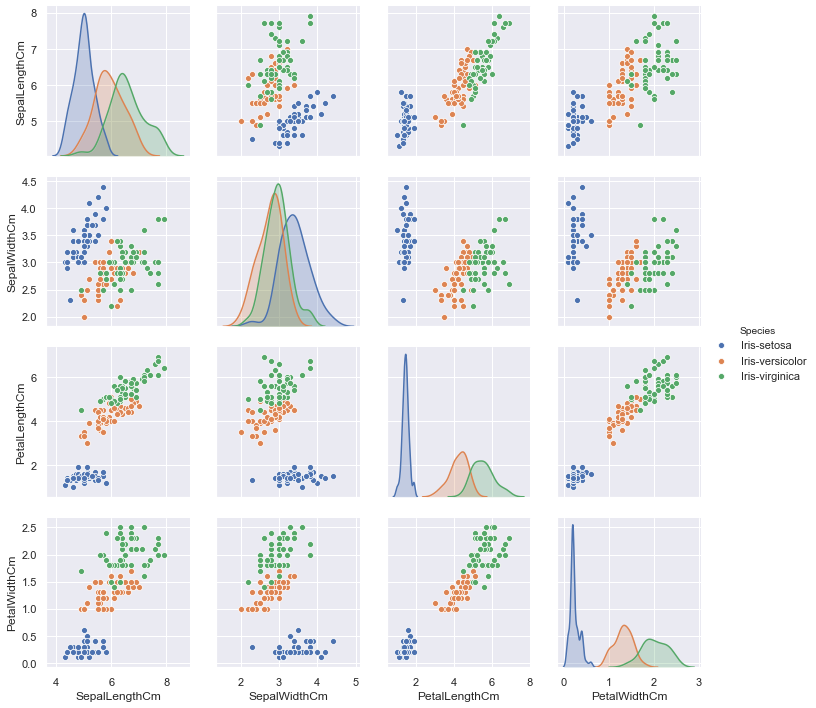

In [11]:
sns.pairplot(dataset, hue = 'Species', diag_kind = 'kde')

### Split Attribute - Target

In [12]:
target = dataset.Species
attribute = dataset.drop(['Species'], axis = 'columns')

### Split Train - Test

In [13]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(attribute, target, test_size = 0.2, random_state = 0)

## Classification Models

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def predict(model):
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)

    print(classification_report(test_Y, prediction))
    print(confusion_matrix(test_Y, prediction))
    print('\nAccuracy:', accuracy_score(prediction, test_Y))

In [15]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
predict(model)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]

Accuracy: 0.9666666666666667


In [16]:
# Support Vector Machine
from sklearn.svm import SVC
model = SVC()
predict(model)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy: 1.0


In [17]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=6)
predict(model)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy: 1.0


In [18]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
predict(model)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

Accuracy: 0.9666666666666667


In [19]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
predict(model)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy: 1.0
